# Introducción a OpenCV-Python

Imágenes en OpenCV
Cargar, salvar y mostrar imágenes
Acceder a los datos de los píxeles
Manipular los canales de color
Uso de matplotlib

In [1]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline  
#%matplotlib qt
# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np #
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt


In [2]:
# Cargar una imagen en modo monocromático (un canal)
img = cv.imread('imgBloque1.bmp', cv.IMREAD_GRAYSCALE)

# Dimensión de la imagen
print(f'Tamaño imagen: {img.shape} pix')
print(img)

Tamaño imagen: (480, 640) pix
[[ 62  62  61 ... 255 222 176]
 [ 62  62  61 ... 255 222 176]
 [ 61  61  60 ... 255 219 173]
 ...
 [ 68  68  69 ... 100 101 102]
 [ 67  67  67 ... 103 103 102]
 [ 66  66  66 ... 108 105 103]]


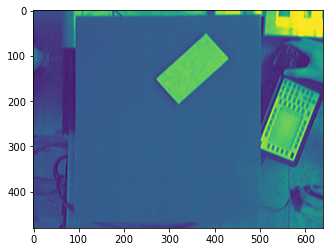

In [3]:
# Muestro la imagen con matplotlib
plt.figure()
plt.imshow(img)
plt.show()

# Qué pasó con la visualización ???

In [4]:
# Visualizamos con funciones de opencv
cv.imshow('image', img)
# El programa cierra la ventana al presionar cualquie tecla
cv.waitKey(0) 
cv.destroyAllWindows()

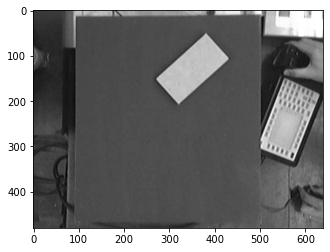

In [5]:
# Quiero ver la imagen en tonos de grises
plt.imshow(img, cmap='gray')
plt.show()

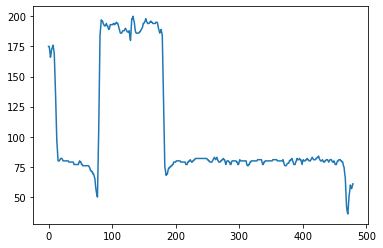

In [6]:
# Quiero ver un perfil. Es decir la intensidad a lo largo de la columna 350 por ejemplo
perfil = img[:, 350]
plt.plot(perfil)
plt.show()

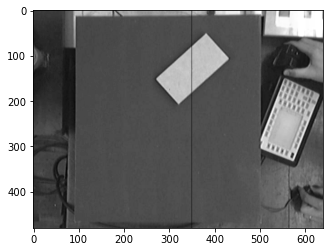

In [7]:
# Ahora hagamos una marca en la imagen para indicar la línea que usamos para tomar el perfil
img_anotada = img.copy()
img_anotada[:,350] = 0
plt.figure()
plt.imshow(img_anotada,cmap='gray')
plt.show()

Tamaño imagen: (480, 640, 3)


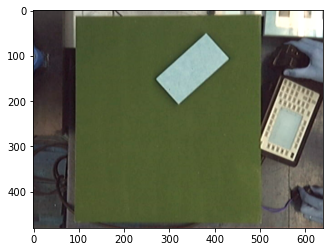

In [8]:
# Ahora quiero verla como imagen en color
img_color = cv.imread('imgBloque1.bmp')
#print(img_color)
# Dimensión de la imagen
print(f'Tamaño imagen: {img_color.shape}')
# Muestro la imagen color
plt.imshow(img_color)
plt.show()

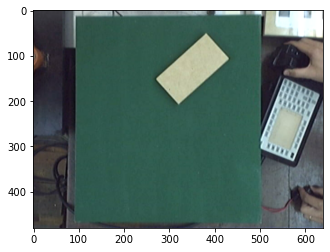

In [9]:
# Parece que tengo problemas con la paleta de colores 
# Paso la imagen de BRG a RGB
imgRGB = cv.cvtColor(img_color, cv.COLOR_BGR2RGB)
plt.imshow(imgRGB)
plt.show()

#### Ejercicio: Hallar una forma sencilla de invertir el orden de los canales usando Numpy

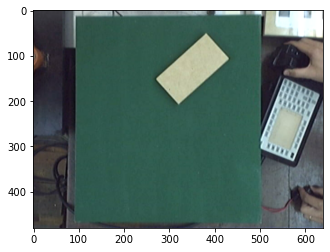

In [10]:
# Respuesta
imgRGB = img_color[:, :, ::-1]
plt.imshow(imgRGB)
plt.show()

# Otra 
imgRGB = img_color[..., ::-1]

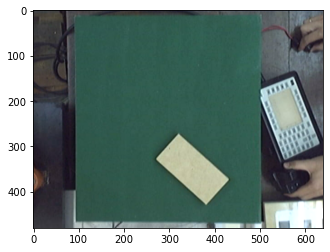

In [11]:
imgRGB_inv = img_color[::-1, :, ::-1]
plt.imshow(imgRGB_inv)
plt.show()

[[ 62  62  61 ... 255 218 172]
 [ 62  62  61 ... 255 218 172]
 [ 61  61  60 ... 255 215 169]
 ...
 [ 68  68  69 ...  90  91  92]
 [ 67  67  67 ...  92  93  92]
 [ 66  66  66 ...  97  95  93]]
Canal rojo


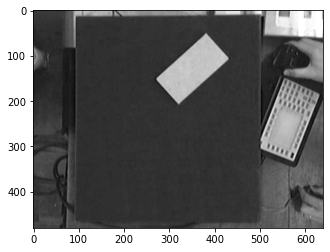

Canal verde


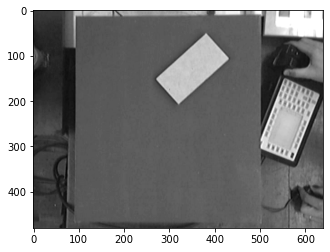

Canal azul


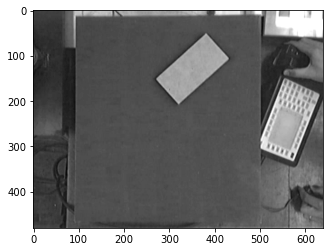

In [12]:
# Quiero desensamblar los canales para trabajarlos por separado

im_r, im_g, im_b = cv.split(imgRGB)
print(im_r)
print('Canal rojo')
plt.imshow(im_r, cmap='gray')
plt.show()
print('Canal verde')
plt.imshow(im_g, cmap='gray')
plt.show()
print('Canal azul')
plt.imshow(im_b, cmap='gray')
plt.show()

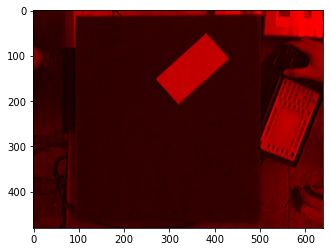

In [13]:
# Vamos a eliminar un plano y reconstruimos la imagen
imgRGB2 = cv.merge((im_r, im_g * 0, im_b * 0))

plt.imshow(imgRGB2)
plt.show()
#  Qué combinación de canales me da la mayor discriminación ??

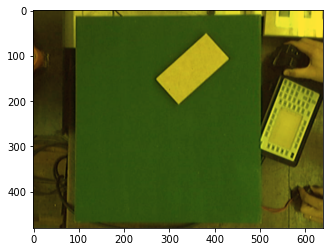

In [14]:
# Vamos a componer la imagen color con distintos pesos en los canales
# Notar el uso de uint8 !!
imgRGB2 = cv.merge((im_r, np.uint8(im_g*0.9), np.uint8(im_b*0.2)))
plt.imshow(imgRGB2)
plt.show()

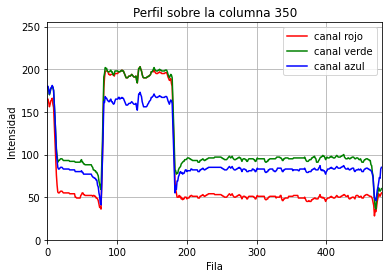

In [15]:
idx_col = 350
perfil_color = imgRGB[:,idx_col]
plt.plot(perfil_color[:,0], color='r', label='canal rojo')
plt.plot(perfil_color[:,1], color='g', label='canal verde')
plt.plot(perfil_color[:,2], color='b', label='canal azul')
plt.xlabel('Fila')
plt.ylabel('Intensidad')
plt.title(f'Perfil sobre la columna {idx_col}')
plt.grid()
plt.xlim(0, 480)
plt.ylim(0, 255)
plt.legend()
plt.show()

In [16]:
# Guardamos la imagen modificada
# Verificar cómo quedaron los colores y tratar de explicar qué pasó
cv.imwrite('modificada.png', imgRGB2)

True